<a href="https://colab.research.google.com/github/estefaniateni/Visualizacion/blob/master/ActividadGuiada3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Estefanía Teniente<br>
Google Colab:  https://colab.research.google.com/drive/1qL2GHtyXOn88W0TQuPD6e1JYAtIW3M31?usp=sharing

In [ ]:
#Importamos modulos

import pandas as pd

import io

import requests

import seaborn as sns

import timeit

import matplotlib.pyplot as plt

In [ ]:
#Cargamos el data set de los pasajeros del Titanic

url="http://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"

s=requests.get(url).content

titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#renombramos alguna de las columnas:

#columna class - clase
titanic.rename(columns={'class': 'clase'}, inplace=True)
#columna fare - tarifa
titanic.rename(columns={'fare': 'tarifa'}, inplace=True)

In [ ]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Definimos nuevas columnas

#definimos una nueva función que nos añade una columna "is_old" para indicar que dicha persona es mayor de 60 años
def is_old_func(row):

  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

In [ ]:
#definimos otro función para que nos indique si es un niño o no (otra forma)
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)


In [ ]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,False,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,False,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False,True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,False,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False,False,True


In [ ]:
#definimos una variable numérica a "clase"
def class_num_func(row):
  Clase={"Third":3, "Second":2,"First":1}
  return Clase [row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [ ]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [ ]:
#Consulta con condiciones /Filtros: Mujeres mayores de 45 años que no han sobrevivido

titanic[

(titanic.sex == 'female')

& (titanic['clase'].isin(['First', 'Third']))

& (titanic.age > 45 )

& (titanic.survived == 0)

]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


In [ ]:
#Consulta con condiciones /Filtros: Mujeres menores de 45 años que no han sobrevivido

titanic[

(titanic.sex == 'female')

& (titanic['clase'].isin(['First', 'Third']))

& (titanic.age < 45 )

& (titanic.survived == 0)

]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True,False,True,3
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,False,True,3
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
49,0,3,female,18.0,1,0,17.8000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
100,0,3,female,28.0,0,0,7.8958,S,Third,woman,False,NaN,Southampton,no,True,False,False,3
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False,False,True,3
113,0,3,female,20.0,1,0,9.8250,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


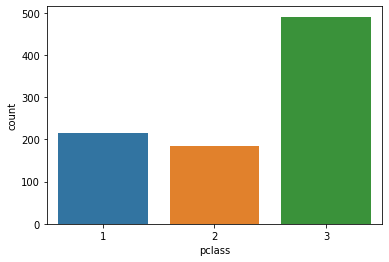

In [ ]:
#Gráfico para contabilizar número de pasajeros por clase
sns.countplot(x="pclass", data=titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


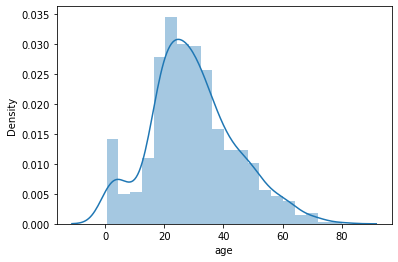

In [ ]:
#Gráfico Histograma por edades(ege)

sns.distplot(titanic.age.dropna( ))
plt.show( )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


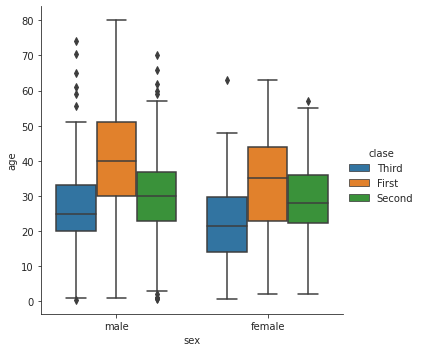

In [ ]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
  ax = sns.catplot("sex", "age", "clase" ,data=titanic, kind="box")

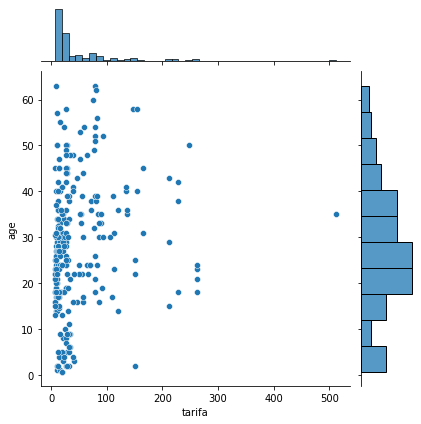

In [ ]:
#Gráfico de dispersion
#Distribución cruzada de Edad y Tarifa (solo datos de mujeres)

sns.jointplot(x='tarifa',y='age',data=titanic[(titanic.sex == "female")])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

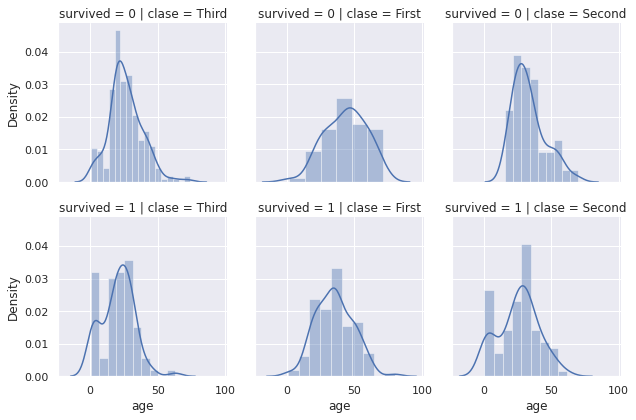

In [ ]:
#Distribución de la edad según categorías:survived y clase

#Cambiamos el font
sns.set(font_scale=1)

#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age")

plt.show()

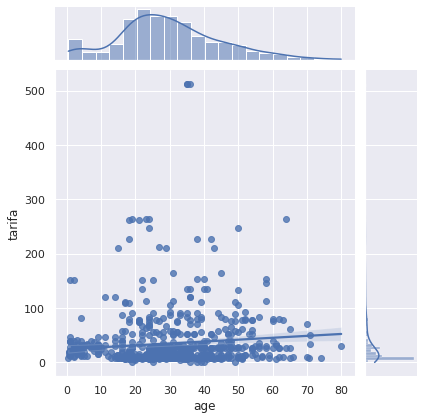

In [ ]:
#Distribución de la edad según Categorias: precio
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)

sns.jointplot(data=titanic, x='age', y='tarifa',

kind='reg', color='b')

plt.show()

Text(0.5, 1.0, 'titanic.corr()')

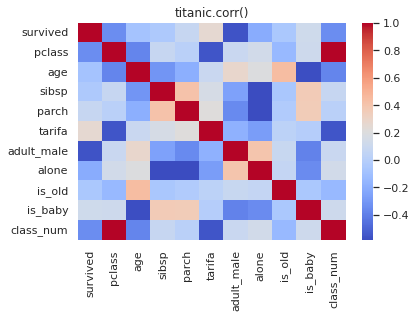

In [ ]:
#Mapa de calor de correlaciones
tc=titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

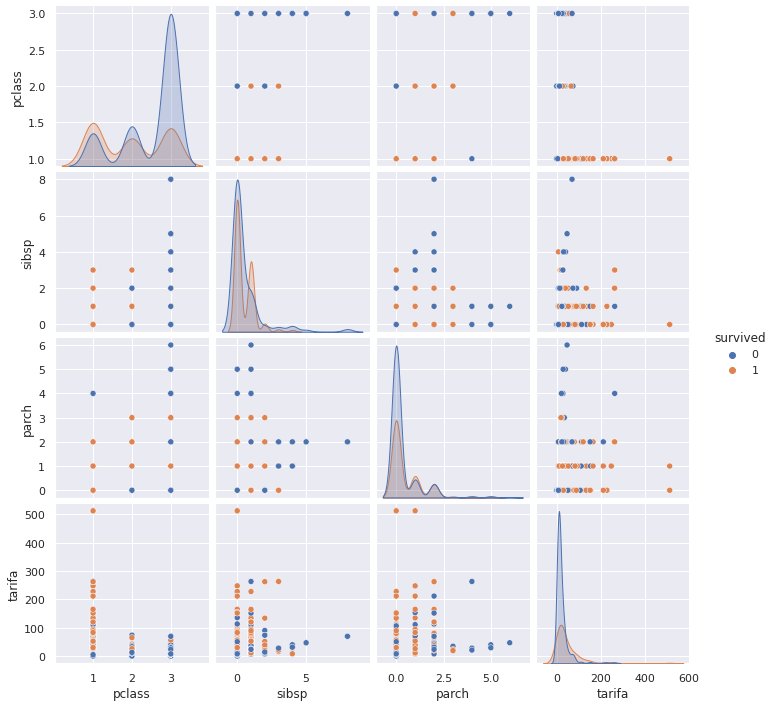

In [ ]:
#Diagrama de Dispersión de parejas de variables cuantitativas

#Definimos un subconjunto de datos con las variables numéricas
titanic_num=titanic[['survived','pclass', 'sibsp', 'parch', 'tarifa']]
#Hace una matriz de diagramas de dispersion de parejas de variables
sns.pairplot(titanic_num, hue="survived")
plt.show()